In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy.optimize import curve_fit
# %matplotlib inline

## chronopotentiometry For CNF Paper.xlsx visualization

In [20]:
# Load the Excel file
file_path = 'chronopotentiometry For CNF Paper.xlsx'
xls = pd.ExcelFile(file_path)

### first_sheet (85C)

In [21]:
# Load the first sheet into a DataFrame
first_sheet_df = xls.parse(xls.sheet_names[0], header=1)
first_sheet_df = first_sheet_df[['time/hours', 'Ewe/mV.4']]


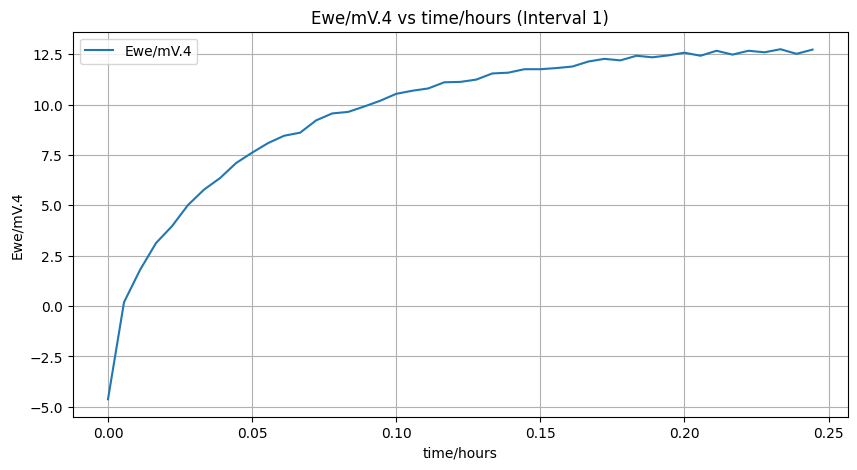

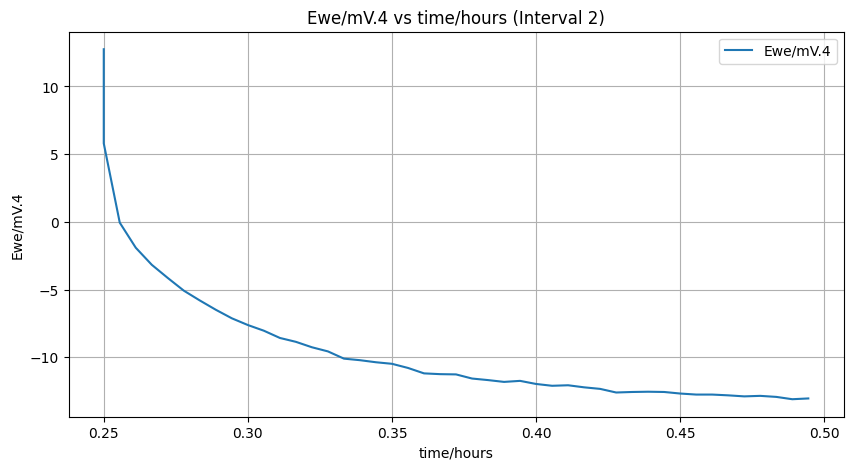

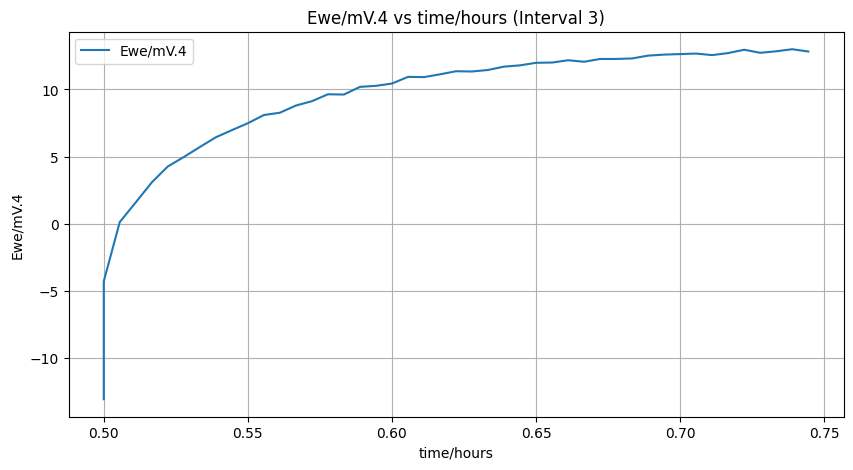

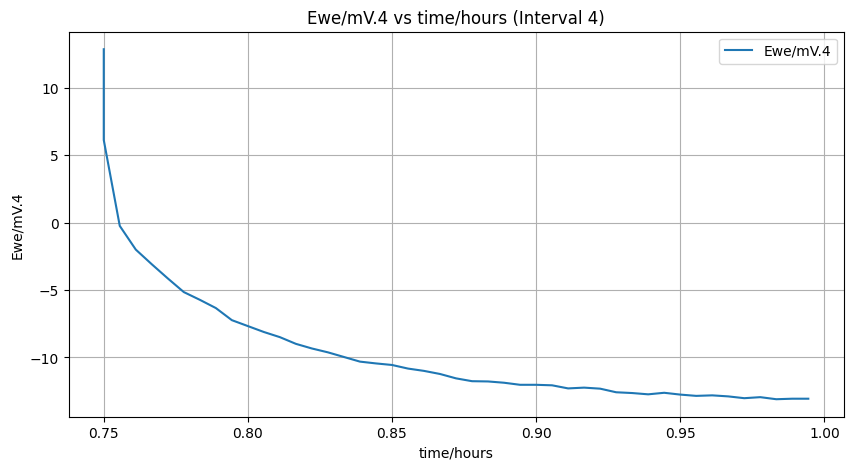

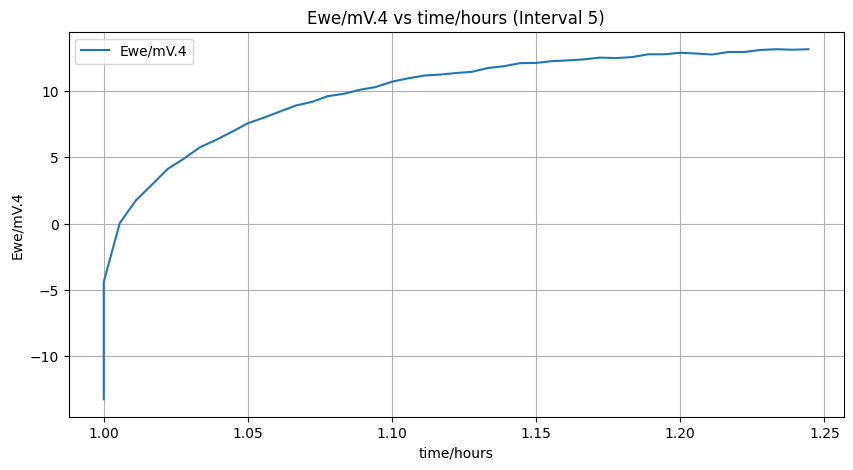

In [10]:
# # Define the interval you want to divide your data into
# interval = 0.249

# # Define time column and columns to plot
# time_column = 'time/hours'
# columns_to_plot = ['Ewe/mV.4']

# # Determine the number of plots needed based on the data length and interval
# num_plots = int(len(first_sheet_df) / interval) + 1

# # Plot each relevant column against 'time/hours' in separate figures
# for i in range(5):  # Plotting the first five intervals
#     plt.figure(figsize=(10, 5))
    
#     # Calculate the start and end times for the current interval
#     start_time = i * interval
#     end_time = (i + 1) * interval
    
#     # Slice the data within the current interval
#     data_subset = first_sheet_df[(first_sheet_df[time_column] >= start_time) & 
#                                  (first_sheet_df[time_column] < end_time)]
    
#     for col in columns_to_plot:
#         plt.plot(data_subset[time_column], data_subset[col], label=col)
    
#     plt.xlabel(time_column)
#     plt.ylabel(columns_to_plot[0])  # Assuming only one column is plotted
#     plt.title(f'{columns_to_plot[0]} vs {time_column} (Interval {i+1})')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


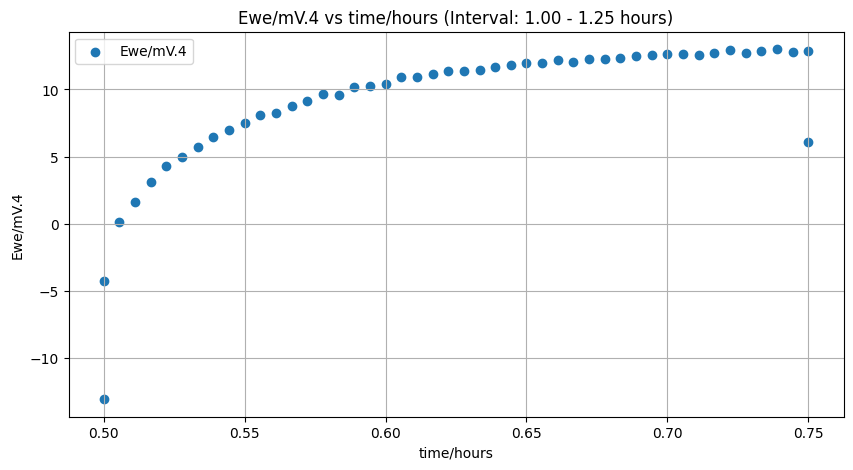

In [23]:
# Filter DataFrame for the interval between 1.00 to 1.25 hours
interval_df = first_sheet_df[(first_sheet_df['time/hours'] >= 0.50) & (first_sheet_df['time/hours'] <= 0.75)]

# Define time column and columns to plot
time_column = ['time/hours']
columns_to_plot = ['Ewe/mV.4']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.scatter(interval_df[time_col], interval_df[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col} (Interval: 1.00 - 1.25 hours)')
        plt.legend()
        plt.grid(True)
        plt.show()


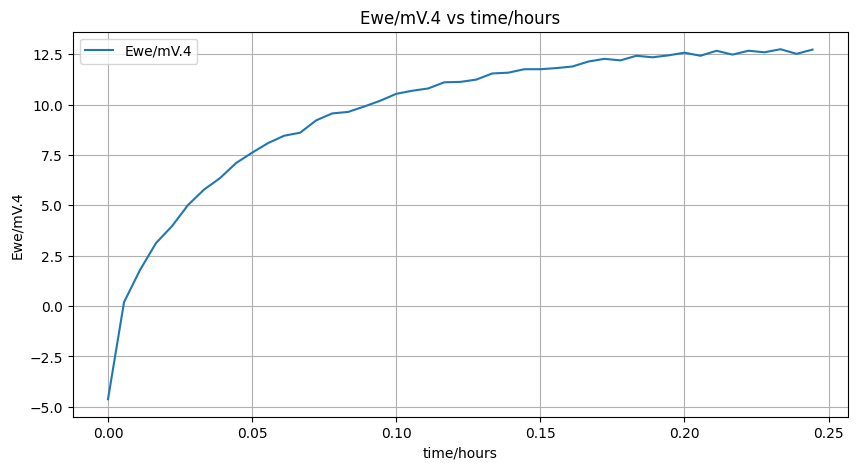

In [17]:
first_sheet_df = first_sheet_df[first_sheet_df['time/hours'] <= 0.249]
# Define time column and columns to plot
# time_column = ['time/hours', 'time/s', 'time/cycles']
time_column = ['time/hours']
columns_to_plot = ['Ewe/mV.4']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.plot(first_sheet_df[time_col], first_sheet_df[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col}')
        plt.legend()
        plt.grid(True)
        plt.show()

In [12]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit

# # Example data (replace with your actual data)
# first_sheet_df = pd.DataFrame({
#     'time/hours': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],  # Example time column
#     'Ewe/mV.4': [10, 15, 12, 18, 20, 17, 22]  # Example data to fit
# })

# # Define the response variable and predictor variable
# y = first_sheet_df['Ewe/mV.4'].values
# x = first_sheet_df['time/hours'].values

# # Check for NaNs or infs
# nan_mask = ~np.isnan(x) & ~np.isnan(y) & np.isfinite(x) & np.isfinite(y)
# x = x[nan_mask]
# y = y[nan_mask]

# # Define the generalized exponential model
# def generalized_exponential_model(t, a, b, c):
#     return a * (1 - np.exp(-b * t)) + c

# # Initial guesses for the parameters a, b, c
# initial_guess = [max(y), 1, min(y)]

# # Fit the model to the first interval (0 to 0.249 hours)
# first_interval_mask = (x >= 0) & (x < 0.249)
# x_first_interval = x[first_interval_mask]
# y_first_interval = y[first_interval_mask]

# if len(x_first_interval) > 2:
#     params_first, covariance_first = curve_fit(generalized_exponential_model, x_first_interval, y_first_interval, p0=initial_guess, maxfev=2000)
#     a_fitted_first, b_fitted_first, c_fitted_first = params_first
#     y_fitted_first = generalized_exponential_model(x_first_interval, a_fitted_first, b_fitted_first, c_fitted_first)
#     plt.plot(x_first_interval, y_fitted_first, label=f'Fitted Model (Interval 1): a={a_fitted_first:.4f}, b={b_fitted_first:.4f}, c={c_fitted_first:.4f}', color='red')
# else:
#     print("Not enough data points in the first interval to fit the model.")

# # Fit the model to the third interval (0.498 to 0.747 hours)
# third_interval_mask = (x >= 0.498) & (x < 0.747)
# x_third_interval = x[third_interval_mask]
# y_third_interval = y[third_interval_mask]
# params_third, covariance_third = curve_fit(generalized_exponential_model, x_third_interval, y_third_interval, p0=initial_guess, maxfev=2000)
# a_fitted_third, b_fitted_third, c_fitted_third = params_third
# y_fitted_third = generalized_exponential_model(x_third_interval, a_fitted_third, b_fitted_third, c_fitted_third)

# # Fit the model to the fifth interval (0.996 to 1.245 hours)
# fifth_interval_mask = (x >= 0.996) & (x < 1.245)
# x_fifth_interval = x[fifth_interval_mask]
# y_fifth_interval = y[fifth_interval_mask]
# params_fifth, covariance_fifth = curve_fit(generalized_exponential_model, x_fifth_interval, y_fifth_interval, p0=initial_guess, maxfev=2000)
# a_fitted_fifth, b_fitted_fifth, c_fitted_fifth = params_fifth
# y_fitted_fifth = generalized_exponential_model(x_fifth_interval, a_fitted_fifth, b_fitted_fifth, c_fitted_fifth)

# # Plot data and fitted models for specified intervals
# plt.figure(figsize=(10, 5))

# # Plot data
# plt.scatter(x, y, label='Data')

# # Plot fitted models for specified intervals
# plt.plot(x_first_interval, y_fitted_first, label=f'Fitted Model (Interval 1): a={a_fitted_first:.4f}, b={b_fitted_first:.4f}, c={c_fitted_first:.4f}', color='red')
# plt.plot(x_third_interval, y_fitted_third, label=f'Fitted Model (Interval 3): a={a_fitted_third:.4f}, b={b_fitted_third:.4f}, c={c_fitted_third:.4f}', color='blue')
# plt.plot(x_fifth_interval, y_fitted_fifth, label=f'Fitted Model (Interval 5): a={a_fitted_fifth:.4f}, b={b_fitted_fifth:.4f}, c={c_fitted_fifth:.4f}', color='green')

# plt.xlabel('Time (hours)')
# plt.ylabel('Ewe/mV.4')
# plt.title('Generalized Exponential Model Fitting for Specific Intervals')
# plt.legend()
# plt.grid(True)
# plt.show()


Not enough data points in the first interval to fit the model.


C:\Users\onyer\AppData\Local\Temp\ipykernel_26804\3660124804.py:45: OptimizeWarning: Covariance of the parameters could not be estimated
  params_third, covariance_third = curve_fit(generalized_exponential_model, x_third_interval, y_third_interval, p0=initial_guess, maxfev=2000)


ValueError: `ydata` must not be empty!

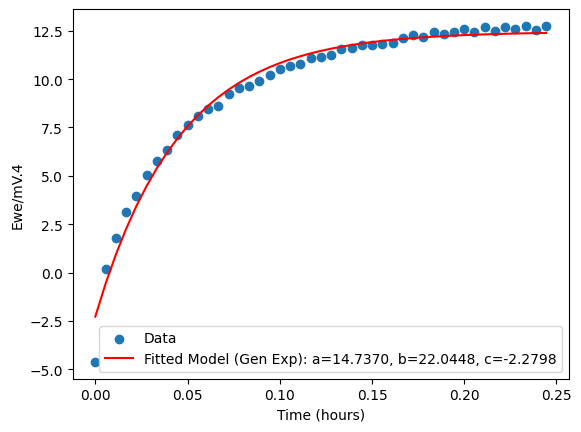

In [18]:
# Assuming you have already loaded your data into first_sheet_df
# Define the response variable and predictor variable
y = first_sheet_df['Ewe/mV.4'].values
x = first_sheet_df['time/hours'].values

# Check for NaNs or infs
nan_mask = ~np.isnan(x) & ~np.isnan(y) & np.isfinite(x) & np.isfinite(y)
x = x[nan_mask]
y = y[nan_mask]

# Define the generalized exponential model
def generalized_exponential_model(t, a, b, c):
    return a * (1 - np.exp(-b * t)) + c

# Initial guesses for the parameters a, b, c
initial_guess = [max(y), 1, min(y)]

# Fit the model
params, covariance = curve_fit(generalized_exponential_model, x, y, p0=initial_guess, maxfev=2000)
a_fitted, b_fitted, c_fitted = params

# Generate fitted values
y_fitted = generalized_exponential_model(x, a_fitted, b_fitted, c_fitted)

# Plot data and fitted model
plt.scatter(x, y, label='Data')
plt.plot(x, y_fitted, label=f'Fitted Model (Gen Exp): a={a_fitted:.4f}, b={b_fitted:.4f}, c={c_fitted:.4f}', color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Ewe/mV.4')
plt.legend()
plt.show()


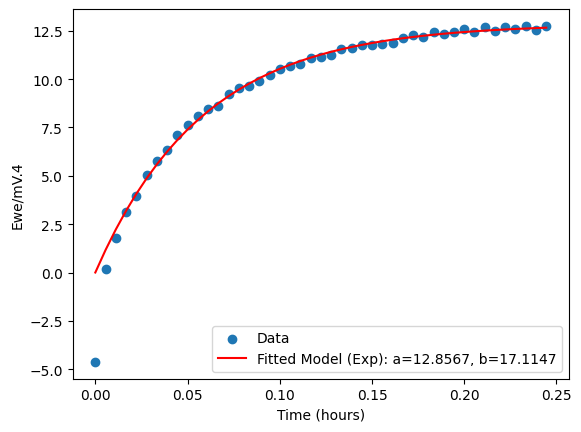

In [47]:
# Define the exponential growth model
def exponential_model(t, a, b):
    return a * (1 - np.exp(-b * t))

# Initial guesses for the parameters a and b
initial_guess = [max(y), 1]

# Fit the model
params, covariance = curve_fit(exponential_model, x, y, p0=initial_guess, maxfev=2000)
a_fitted, b_fitted = params

# Generate fitted values
y_fitted = exponential_model(x, a_fitted, b_fitted)

# Plot data and fitted model
plt.scatter(x, y, label='Data')
plt.plot(x, y_fitted, label=f'Fitted Model (Exp): a={a_fitted:.4f}, b={b_fitted:.4f}', color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Ewe/mV.4')
plt.legend()
plt.show()


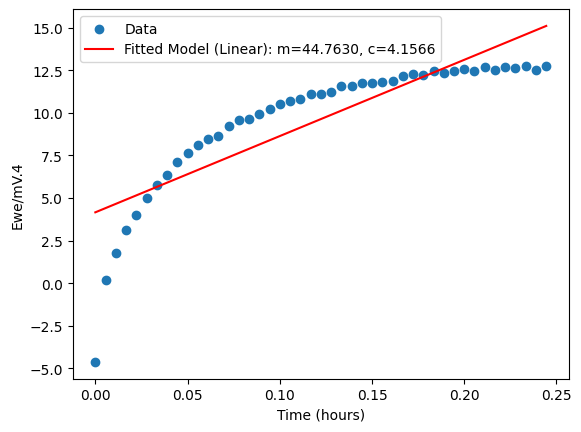

In [48]:
# Define the linear model
def linear_model(t, m, c):
    return m * t + c

# Initial guesses for the parameters m and c
initial_guess = [1, 0]

# Fit the model
params, covariance = curve_fit(linear_model, x, y, p0=initial_guess, maxfev=2000)
m_fitted, c_fitted = params

# Generate fitted values
y_fitted = linear_model(x, m_fitted, c_fitted)

# Plot data and fitted model
plt.scatter(x, y, label='Data')
plt.plot(x, y_fitted, label=f'Fitted Model (Linear): m={m_fitted:.4f}, c={c_fitted:.4f}', color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Ewe/mV.4')
plt.legend()
plt.show()


In [53]:
#calculate sse
sse = np.sum((generalized_exponential_model.fittedvalues - first_sheet_df['Ewe/mV.4'])**2)
print(sse)

#calculate ssr
ssr = np.sum((generalized_exponential_model.fittedvalues - first_sheet_df['Ewe/mV.4'].mean())**2)
print(ssr)


#calculate sst
sst = ssr + sse
print(sst)


AttributeError: 'function' object has no attribute 'fittedvalues'

### second_sheet (65C)

In [19]:
# Load the first sheet into a DataFrame
second_sheet_df = xls.parse(xls.sheet_names[1])

In [20]:
second_sheet_df = second_sheet_df[second_sheet_df['time/hours'] <= 0.25]

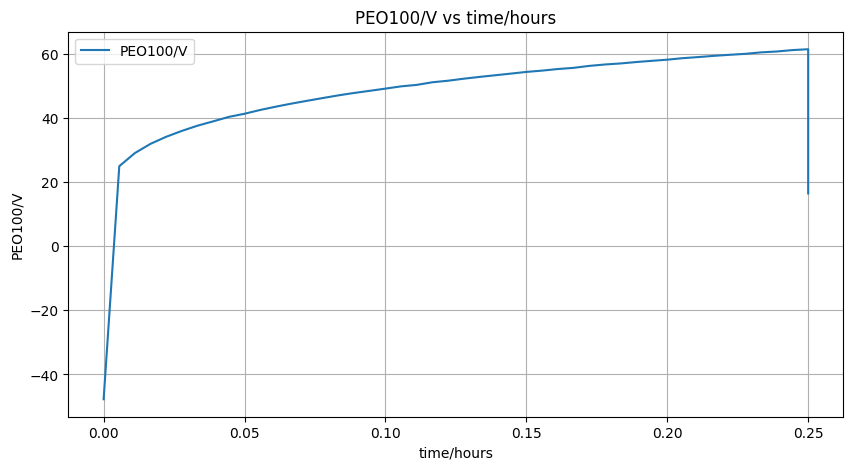

In [22]:
# Define time column and columns to plot
# time_column = ['time/s', 'time/s.2','time/hours', 'time/cycles']
time_column = ['time/hours']
columns_to_plot = ['PEO100/V']

# Plot each relevant column against 'time/hours'
for col in columns_to_plot:
    for time_col in time_column:
        plt.figure(figsize=(10, 5))
        plt.plot(second_sheet_df[time_col], second_sheet_df[col], label=col)
        plt.xlabel(time_col)
        plt.ylabel(col)
        plt.title(f'{col} vs {time_col}')
        plt.legend()
        plt.grid(True)
        plt.show()